<a href="https://colab.research.google.com/github/Austin795/ML-LSTM-Stocks/blob/master/LSTM_Predictor_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

!pip install stockstats
import stockstats

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Ticker = "aapl"

end = datetime(2020, 4, 1)
Start = datetime(end.year-5, end.month, end.day)
data = web.get_data_yahoo(Ticker, Start, end, interval="d")

data.to_csv(r'StockData_Train')
dataset = pd.read_csv('StockData_Train',index_col="Date",parse_dates=True)
print(dataset)

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2015-04-01  125.120003  123.099998  ...  40621400.0  114.342239
2015-04-02  125.559998  124.190002  ...  32220100.0  115.326912
2015-04-06  127.510002  124.330002  ...  37194000.0  117.195030
2015-04-07  128.119995  125.980003  ...  35012300.0  115.961906
2015-04-08  126.400002  124.970001  ...  37329200.0  115.584587
...                ...         ...  ...         ...         ...
2020-03-26  258.679993  246.360001  ...  63021800.0  258.440002
2020-03-27  255.869995  247.050003  ...  51054200.0  247.740005
2020-03-30  255.520004  249.399994  ...  41994100.0  254.809998
2020-03-31  262.489990  252.000000  ...  49250500.0  254.289993
2020-04-01  248.720001  239.130005  ...  44054600.0  240.910004

[1260 rows x 6 columns]


In [3]:
end = datetime(2020, 5, 2)
Start = datetime(2020, 4, 2)
data2 = web.get_data_yahoo(Ticker, Start, end, interval="d")

data2.to_csv(r'StockData_Test')
# dataset = pd.read_csv('StockData_Train',index_col="Date",parse_dates=True)
print(data2)

                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2020-04-02  245.149994  236.899994  ...  41483500  244.929993
2020-04-03  245.699997  238.970001  ...  32470000  241.410004
2020-04-06  263.109985  249.380005  ...  50455100  262.470001
2020-04-07  271.700012  259.000000  ...  50721800  259.429993
2020-04-08  267.369995  261.230011  ...  42223800  266.070007
2020-04-09  270.070007  264.700012  ...  40529100  267.989990
2020-04-13  273.700012  265.829987  ...  32755700  273.250000
2020-04-14  288.250000  278.049988  ...  48748700  287.049988
2020-04-15  286.329987  280.630005  ...  32788600  284.429993
2020-04-16  288.200012  282.350006  ...  39281300  286.690002
2020-04-17  286.950012  276.859985  ...  53812500  282.799988
2020-04-20  281.679993  276.850006  ...  32503800  276.929993
2020-04-21  277.250000  265.429993  ...  45247900  268.369995
2020-04-22  277.899994  272.200012  ...  29264300  276.100006
2020-04-

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-04-01 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


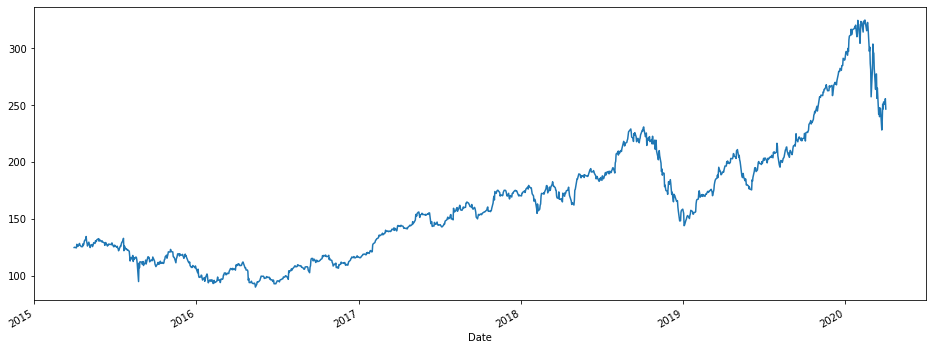

In [4]:
# Data cleaning
dataset.isna().any()
dataset.info()
dataset['Open'].plot(figsize=(16,6))

In [0]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0202
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0027
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price 
dataset_test = pd.read_csv('StockData_Test',index_col="Date",parse_dates=True)

real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()
dataset_test.info()

# dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)


# Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-04-02 to 2020-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       21 non-null     float64
 1   Low        21 non-null     float64
 2   Open       21 non-null     float64
 3   Close      21 non-null     float64
 4   Volume     21 non-null     int64  
 5   Adj Close  21 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [10]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


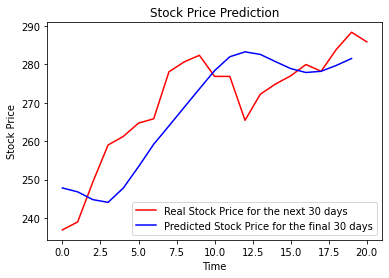

In [11]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price for the next 30 days')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price for the final 30 days')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()